# House Price Prediction Regression Project

## Load Libraries

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

In [2]:
train_data_path = r"C:\Users\Abhinaya Siripurapu\OneDrive\Desktop\abhi\house-value-prediction-ml\data\train.csv"
test_data_path = r"C:\Users\Abhinaya Siripurapu\OneDrive\Desktop\abhi\house-value-prediction-ml\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print(df_train.shape)
print(df_test.shape)


(1460, 81)
(1459, 80)


In [3]:
## Know your data

In [4]:
## Data Integration

In [5]:
df = pd.concat([df_train, df_test])
print(df.shape)

(2919, 81)


In [6]:
## Get the brief information of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [8]:
int_features = df.select_dtypes(include = ["int64"]).columns
print(int_features.shape[0])
print(int_features.tolist())

26
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
float_features = df.select_dtypes(include = ["float64"]).columns
print(float_features.shape[0])
print(float_features.tolist())

12
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [10]:
obj_features = df.select_dtypes(include = ["object"]).columns
print(obj_features.shape[0])
print(obj_features.tolist())

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [11]:
## Handling missing values

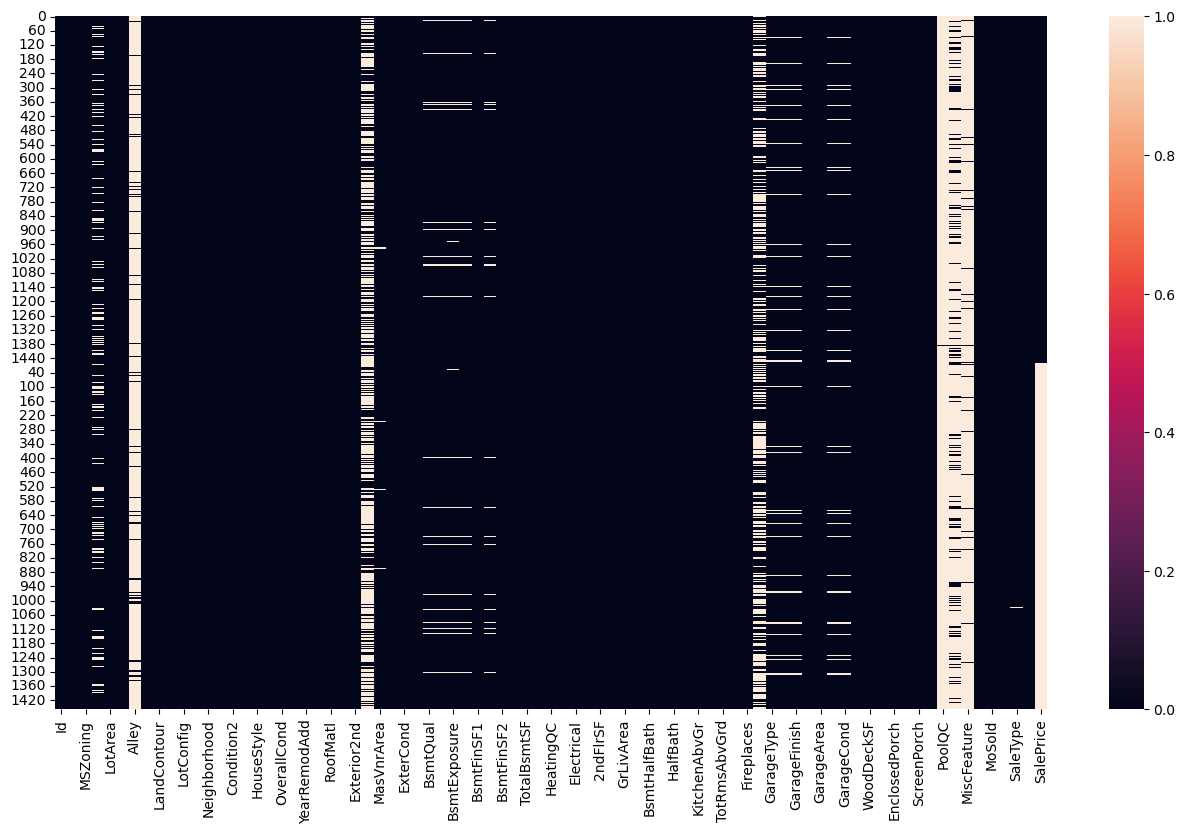

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

In [13]:
## Get the null value percentage for every feature

In [14]:
# Set index as ID column 
df = df.set_index("Id")

In [15]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [16]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [17]:
## Drop Columns / Featurs
"""As per observation, we will not drop any feature from the dataset"""

'As per observation, we will not drop any feature from the dataset'

In [18]:
""" As per the domain knowledge we will not drop those features, instead None value we will add constant value 'NA'"""
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [19]:
""" As per the domain knowledge we will not drop FireplaceQu feature, instead None value we will add constant value 'NA'"""
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [20]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<Axes: ylabel='Id'>

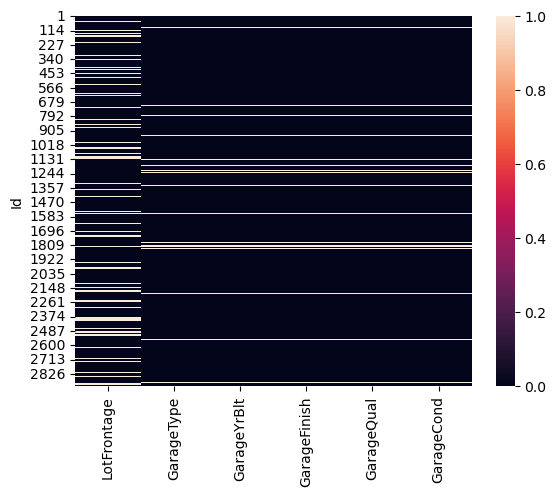

In [21]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [22]:
## Missing Value Imputation

In [23]:
missing_value_feat = null_percent[null_percent > 0]
print(len(missing_value_feat))

35


In [24]:
obj_na_features = missing_value_feat[missing_value_feat.keys().isin(obj_features)]
print(len(obj_na_features))

23


In [25]:
int_na_features = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print(len(int_na_features))

0


In [26]:
flt_na_features = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print(len(flt_na_features))

12


In [27]:
## Handling MSZoning

In [28]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

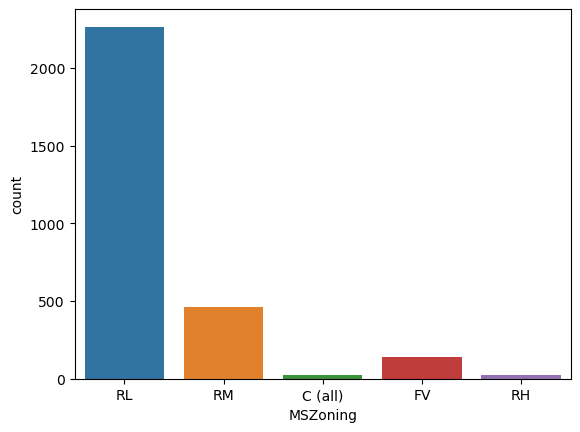

In [29]:
sns.countplot(data=df, x="MSZoning")


In [30]:
### backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [31]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace = True)
df_mvi["MSZoning"].isnull().sum()

0

In [32]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(data = df, x = feature)
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(data = df_new, x = feature)
    plt.title("New Data Distribution")

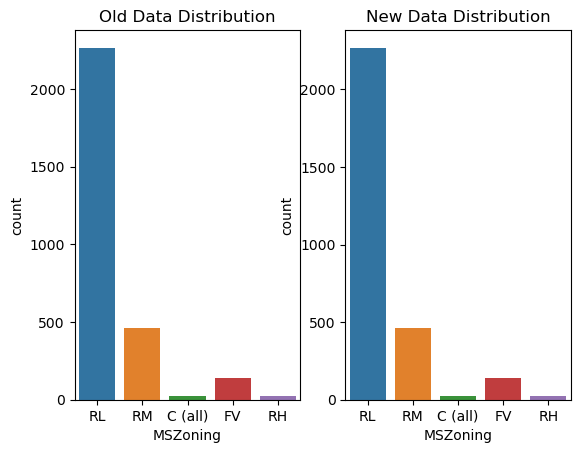

In [33]:
oldNewCountPlot(df, df_mvi, "MSZoning")

In [34]:
## Handling Alley

In [35]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='count'>

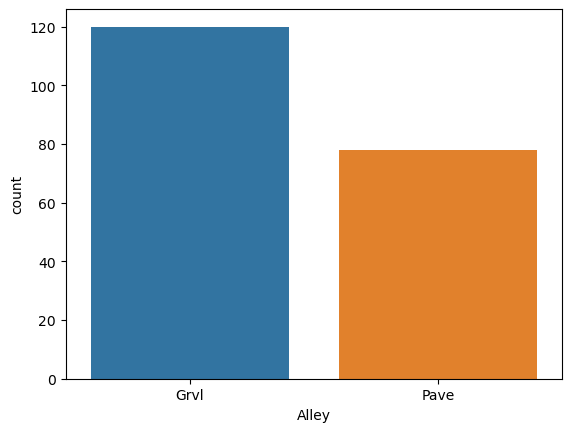

In [36]:
sns.countplot(data=df, x="Alley")

In [37]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan, alley_cont, inplace = True)
df_mvi["Alley"].isnull().sum()

0

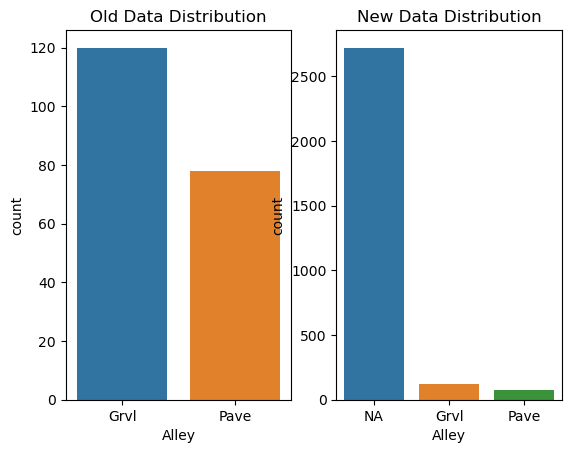

In [38]:
oldNewCountPlot(df, df_mvi, "Alley")

In [39]:
### Handling LotFrontage

In [40]:
def boxHistPlot(df, column, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    
    plt.subplot(121)
    sns.boxplot(x=df[column])
    
    plt.subplot(122)
    sns.histplot(df[column], kde=True)
    

C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


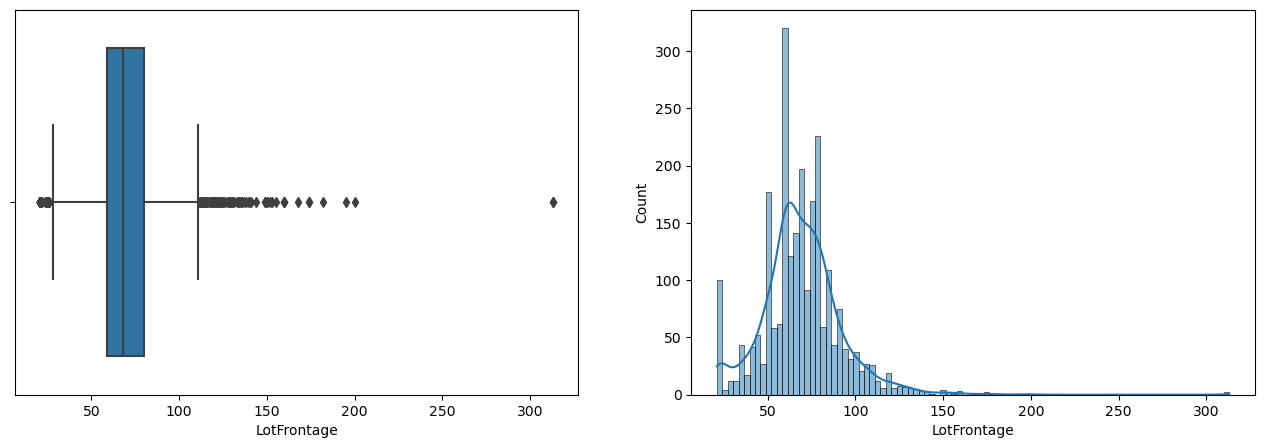

In [41]:
boxHistPlot(df, "LotFrontage")

In [42]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [43]:
def oldNewBoxHistPlot(df, df_new, feature, figsize = (16, 10)):
    plt.figure(figsize = figsize)
    plt.subplot(221)
    sns.boxplot(data = df, x = feature)
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(223)
    sns.boxplot(data = df_new, x = feature)
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df[feature])
    plt.title("New Data Distribution")

C:\Users\Abhinaya Siripurapu\AppData\Local\Temp\ipykernel_22760\3868922876.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhinaya Siripurapu\AppData\Local\Temp\ipykernel_22760\3868922876.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

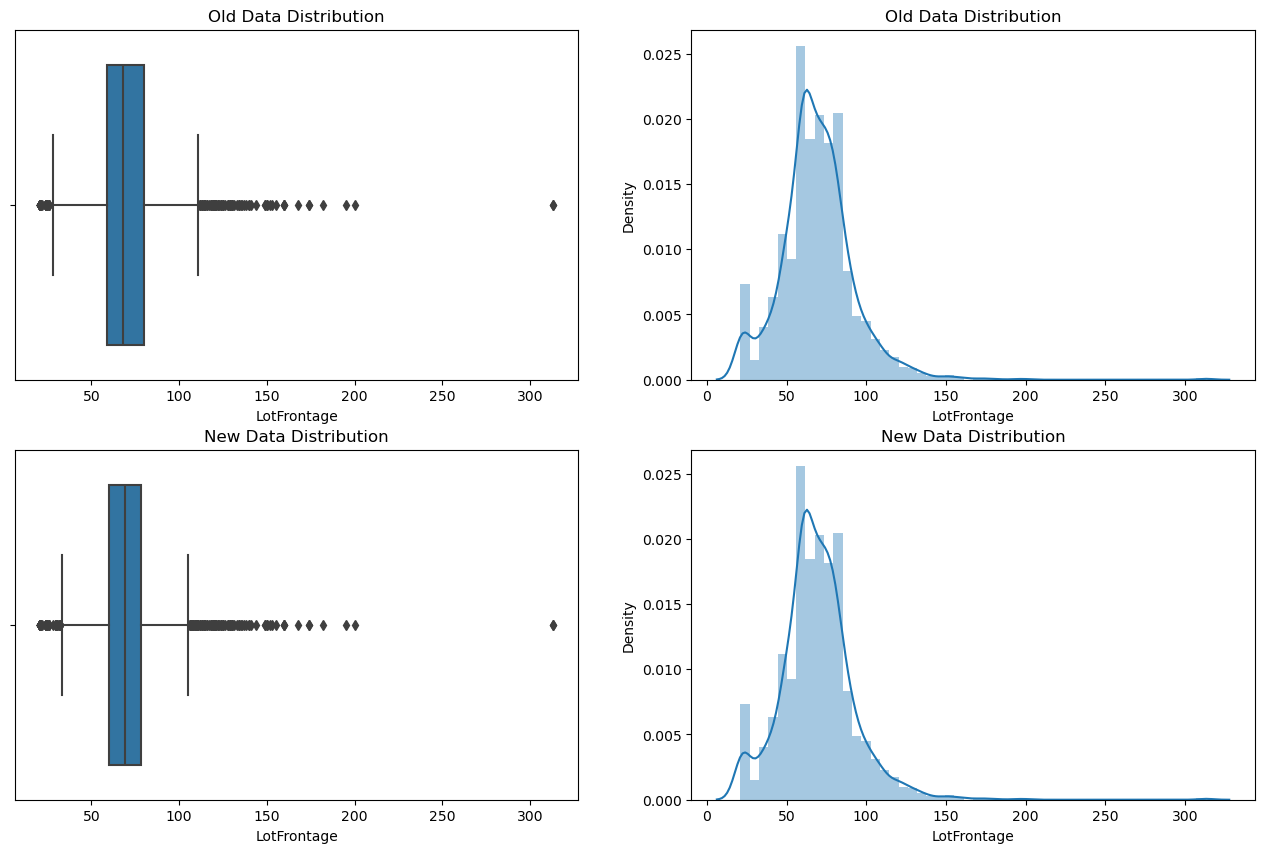

In [44]:
oldNewBoxHistPlot(df, df_mvi, "LotFrontage")

In [45]:
### Handling Utilities

In [46]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [47]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace = True)
df_mvi["Utilities"].isnull().sum()

0

In [48]:
### Handling Exterior1st and Exterior2nd

In [49]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [50]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [51]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace = True)
df_mvi["Exterior1st"].isnull().sum()
df_mvi["Exterior2nd"].isnull().sum()


0

In [52]:
### Handling MasVnrType and MasVnrArea

<Axes: ylabel='Id'>

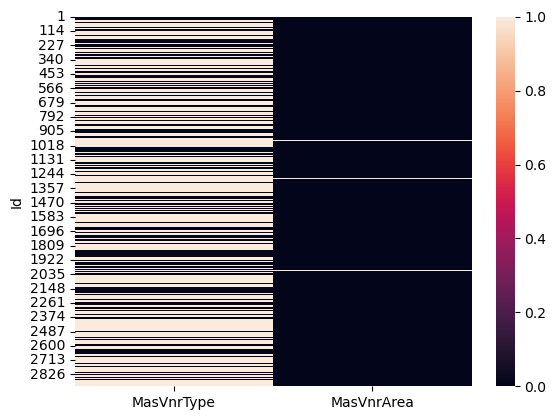

In [53]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [54]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [55]:
masvnrtype_cont = "None"
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_cont, inplace = True)
df_mvi["MasVnrType"].isnull().sum()

0

C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


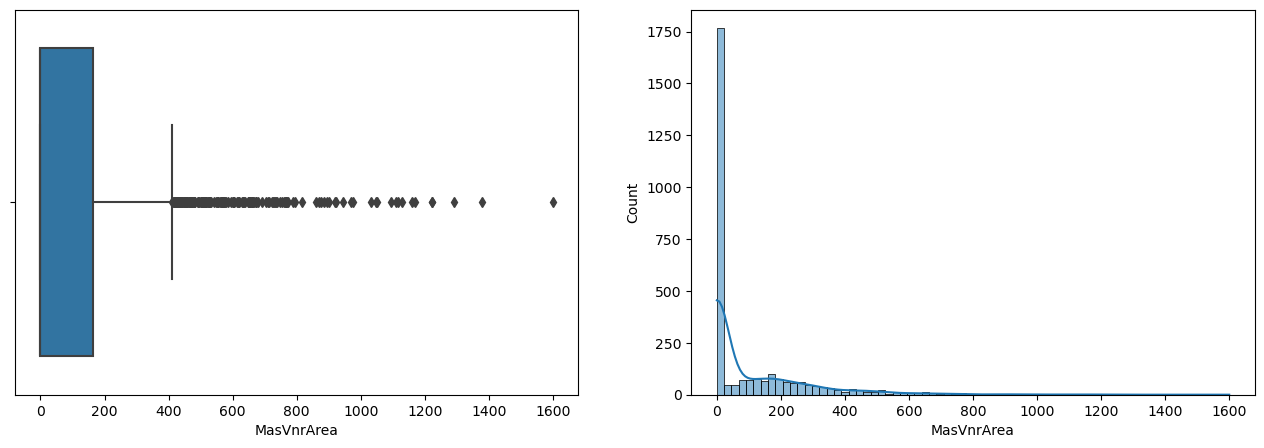

In [56]:
boxHistPlot(df, "MasVnrArea")

In [57]:
masvnrarea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace = True)
df_mvi["MasVnrArea"].isnull().sum()

0

In [58]:
### Handling Bsmt features 

In [59]:
obj_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2"]
int_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

<Axes: ylabel='Id'>

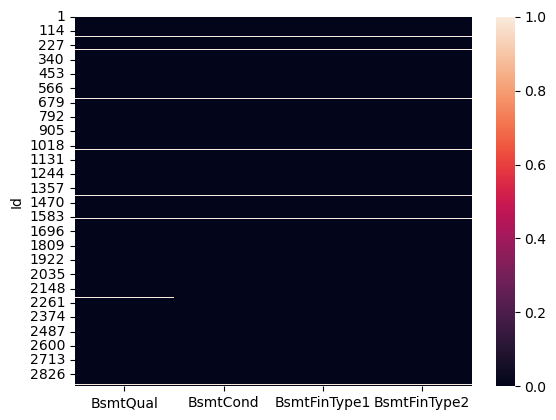

In [60]:
sns.heatmap(df[obj_bsmt_feat].isnull())

<Axes: ylabel='Id'>

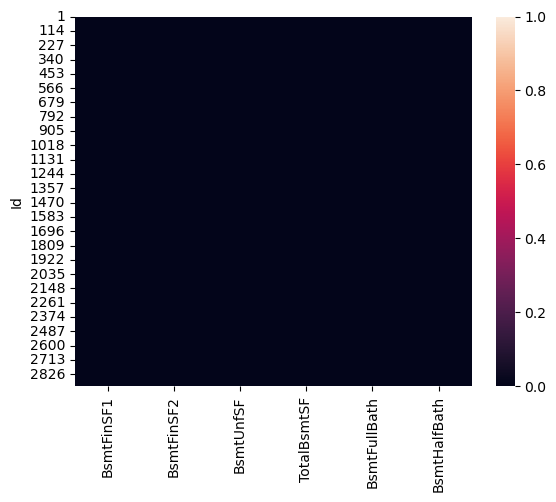

In [61]:
sns.heatmap(df[int_bsmt_feat].isnull())

In [62]:
for feat in obj_bsmt_feat:
    print(df[feat].value_counts())

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [63]:
bsmt_cont = "NA"
for feat in obj_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace = True)

In [64]:
df_mvi[obj_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [65]:
bsmt_int_cont = 0
for feat in int_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_int_cont, inplace = True)

In [66]:
df_mvi[int_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [67]:
### Handling KitchenQual and Electrical 

In [68]:
df["Electrical"].value_counts()


Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [69]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [70]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis = 1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [71]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace = True)
df_mvi["Electrical"].isnull().sum()

0

In [72]:
kitchqual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, kitchqual_mode, inplace = True)
df_mvi["KitchenQual"].isnull().sum()

0

In [73]:
### Handling Functional FireplaceQu PoolQC Fence MiscFeature SaleType

In [74]:
functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, functional_mode, inplace = True)
df_mvi["Functional"].isnull().sum()

0

In [75]:
saletype_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, saletype_mode, inplace = True)
df_mvi["SaleType"].isnull().sum()

0

In [76]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan,fireplacequ_cont, inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [77]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan,fence_cont, inplace = True)
df_mvi["Fence"].isnull().sum()

0

In [78]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan,poolqc_cont, inplace = True)
df_mvi["PoolQC"].isnull().sum()
misc_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan,misc_cont, inplace = True)
df_mvi["MiscFeature"].isnull().sum()


0

In [79]:
### Haandling Garage Features

In [80]:
obj_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
int_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

In [81]:
garage_cont = "NA"
for feat in obj_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace = True)

df_mvi[obj_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [82]:
garage_int_cont = 0
for feat in int_garage_feat:
    df_mvi[feat].replace(np.nan, garage_int_cont, inplace = True)

df_mvi[int_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [83]:
## Feature Tranformation

In [84]:
### Convert Numerical Feature to Categorical Feature 

In [85]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv :
    print(feat, df_mvi[feat].dtype)

MSSubClass int64
YearBuilt int64
YearRemodAdd int64
GarageYrBlt float64
MoSold int64
YrSold int64


In [86]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [87]:
import calendar

calendar.month_abbr[1]

'Jan'

In [88]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [89]:
for feat in for_num_conv :
    df_mvi[feat] = df_mvi[feat].astype(str)

In [90]:
for feat in for_num_conv :
    print(feat, df_mvi[feat].dtype)

MSSubClass object
YearBuilt object
YearRemodAdd object
GarageYrBlt object
MoSold object
YrSold object


In [91]:
### Convert Categorical Feature to Numerical Feature 

In [92]:
#### Ordinal Encoding

In [93]:
ordinal_end_var = [
    "ExterCond",
    "ExterQual",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "BsmtFinSF1",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utlilities"]
print(len(ordinal_end_var))  

18


In [94]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA','Gd', 'Ex', ], ordered = True)).cat.codes

In [95]:
df_mvi["ExterQual"].unique()

array([3, 2, 4, 1], dtype=int8)

In [96]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [97]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [98]:
df_mvi["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=['NA', 'No', 'Mn', 'Av', 'Gd',  ], ordered = True)).cat.codes

In [100]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
 1    1904
 3     418
 4     276
 2     239
-1      82
Name: count, dtype: int64

In [101]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered=True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered=True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered=True)).cat.codes


In [102]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [ ]:
## One Hot Encoding for nominal Categorical Data

In [ ]:
df_enco = df_mvi.copy()

object_features = df_enco.select_dtypes(include = "object").columns.tolist()
print(len(object_features))
print(object_features)

32
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [127]:
df_enco = pd.get_dummies(df_enco, columns=object_features, prefix=object_features, drop_first=True)

In [128]:
df_enco['MSZoning_RL'].value_counts()

MSZoning_RL
True     2269
False     650
Name: count, dtype: int64

In [129]:
df_enco.filter(like='MSZoning').head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
5,False,False,True,False


In [130]:
pd.get_dummies(df_enco['MSZoning_RL'], columns='MSZoning_RL', prefix='MSZoning_RL', drop_first=False)

,MSZoning_RL_False,MSZoning_RL_True
Id,,
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
...,...,...
2915,True,False
2916,True,False
2917,False,True


In [117]:
print(df_encod.columns)

missing_columns = [col for col in object_features if col not in df_encod.columns]
print("Missing Columns:", missing_columns)

existing_object_features = [col for col in object_features if col in df_encod.columns]
print("Columns that exist:", existing_object_features)

df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)

df_encod.info()

Index(['MSZoning_RL_False', 'MSZoning_RL_True'], dtype='object')
Missing Columns: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Columns that exist: []
<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 513 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(465), float64(11), int64(20), int8(17)
memory usage: 2.1 MB


In [131]:
print(df_enco.columns)

Index(['LotFrontage', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=513)


In [139]:
df_enco.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,3,7,5,162.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,3,7,5,0.0,2,2,3,4,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,3,8,5,350.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0


In [140]:
df_enco.select_dtypes(include="object").columns.tolist()

[]

In [138]:
bool_cols = df_enco.select_dtypes(include=['bool']).columns
df_enco[bool_cols] = df_enco[bool_cols].astype(int)


In [ ]:
## Split Data for Training and Testing

In [141]:
df_enco.shape

(2919, 513)

In [142]:
len_train = df_train.shape[0]
len_train

1460

In [143]:
df_enco[:len_train]

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,3,7,5,162.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,3,7,5,0.0,2,2,3,4,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,3,8,5,350.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,3,6,5,0.0,2,2,4,3,...,0,0,0,0,1,0,0,0,1,0
1457,85.0,13175,3,6,6,119.0,2,2,4,3,...,0,0,0,0,1,0,0,0,1,0
1458,66.0,9042,3,7,9,0.0,4,3,3,4,...,0,0,0,0,1,0,0,0,1,0


In [144]:
X_train = df_enco[:len_train].drop("SalePrice", axis=1)
y_train = df_enco["SalePrice"][:len_train]
X_test = df_enco[len_train:].drop("SalePrice", axis = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1460, 512)
(1460,)
(1459, 512)


In [ ]:
## Feature Scaling

In [146]:
sc = StandardScaler()
sc.fit(X_train)
# formula z = (x-u)/s
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [147]:
X_train[:3, :]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [148]:
X_test[:3, :]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [155]:
## Carry forward for deployment 
# sc.mean_
# sc.n_features_in_
# sc.n_samples_seen_
# sc.var_
# sc.with_mean
# sc.with_std

array([6.99179459e+01, 1.05168281e+04, 2.99726027e+00, 6.09931507e+00,
       5.57534247e+00, 1.03117123e+02, 2.39589041e+00, 2.08356164e+00,
       3.48904110e+00, 2.93493151e+00, 1.60410959e+00, 3.54589041e+00,
       4.43639726e+02, 1.24726027e+00, 4.65493151e+01, 5.67240411e+02,
       1.05742945e+03, 3.14520548e+00, 1.16262671e+03, 3.46992466e+02,
       5.84452055e+00, 1.51546370e+03, 4.25342466e-01, 5.75342466e-02,
       1.56506849e+00, 3.82876712e-01, 2.86643836e+00, 1.04657534e+00,
       2.51164384e+00, 6.51780822e+00, 6.84178082e+00, 6.13013699e-01,
       1.82534247e+00, 1.71575342e+00, 1.76712329e+00, 4.72980137e+02,
       2.81027397e+00, 2.80890411e+00, 1.85616438e+00, 9.42445205e+01,
       4.66602740e+01, 2.19541096e+01, 3.40958904e+00, 1.50609589e+01,
       2.75890411e+00, 1.30136986e-02, 4.34890411e+01, 0.00000000e+00,
       4.31506849e-02, 6.84931507e-03, 2.05479452e-02, 3.67123288e-01,
       4.72602740e-02, 2.73972603e-03, 8.21917808e-03, 9.86301370e-02,
      

In [150]:
## Train ML Model

512

In [160]:
!pip install xgboost

In [161]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor


In [165]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()
ir = IsotonicRegression()

In [166]:
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", svr],
    "c": ["SGDRegressor", sgdr],
    "d": ["KNeighborsRegressor", knr],
    "e": ["GaussianProcessRegressor", gpr],
    "f": ["DecisionTreeRegressor", dtr],
    "g": ["GradientBoostingRegressor", gbr],
    "h": ["RandomForestRegressor", rfr],
    "i": ["XGBRegressor", xgbr],
    "j": ["MLPRegressor", mlpr],
    "k": ["IsotonicRegression", ir],
}


In [167]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [168]:
models_score = []

for model in models:
    print("Training model : ", models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of model : ", score)
    models_score.append([models[model][0], score[0]])

Training model :  LinearRegression
Score of model :  [-4.3976080302093206e+24]
Training model :  SVR
Score of model :  [-0.05213335195130802]
Training model :  SGDRegressor
Score of model :  [-5320.049378474464]
Training model :  KNeighborsRegressor
Score of model :  [0.5570463852006106]
Training model :  GaussianProcessRegressor
Score of model :  [-5.398712554903858]
Training model :  DecisionTreeRegressor
Score of model :  [0.6847180849255515]
Training model :  GradientBoostingRegressor
Score of model :  [0.8719942125858202]
Training model :  RandomForestRegressor
Score of model :  [0.844798251049938]
Training model :  XGBRegressor
Score of model :  [0.8582487612757063]
Training model :  MLPRegressor


C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abhinay

Score of model :  [-4.828117634029348]
Training model :  IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 266, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\Abhinaya Siripurapu\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 250, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [ ]:
### accuracy : 87.194%